<a href="https://colab.research.google.com/github/rachelrodrigues/Career-Launch-Group-7/blob/main/Data_Prep_%2B_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




In [79]:
!pip install pyreadstat

In [80]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (1).csv


In [81]:
## define dataset and load it in by reading file
df_fhs = pd.read_csv('framingham.csv')

In [82]:
##from google.colab import drive
##drive.mount('/content/drive')

In [83]:
df_fhs.head() #see what it looks like

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


In [84]:
df_fhs.shape #gives dimensions

(4240, 16)

In [85]:
df_fhs.info() #gives column names, numbers, info on non null entries, type of variable of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [86]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_fhs.describe().transpose() #Display rounded mean, standard dev, min, max, and quartiles

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


In [87]:
## check the extent of the missingness of the columns
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

In [88]:
import missingno as msno

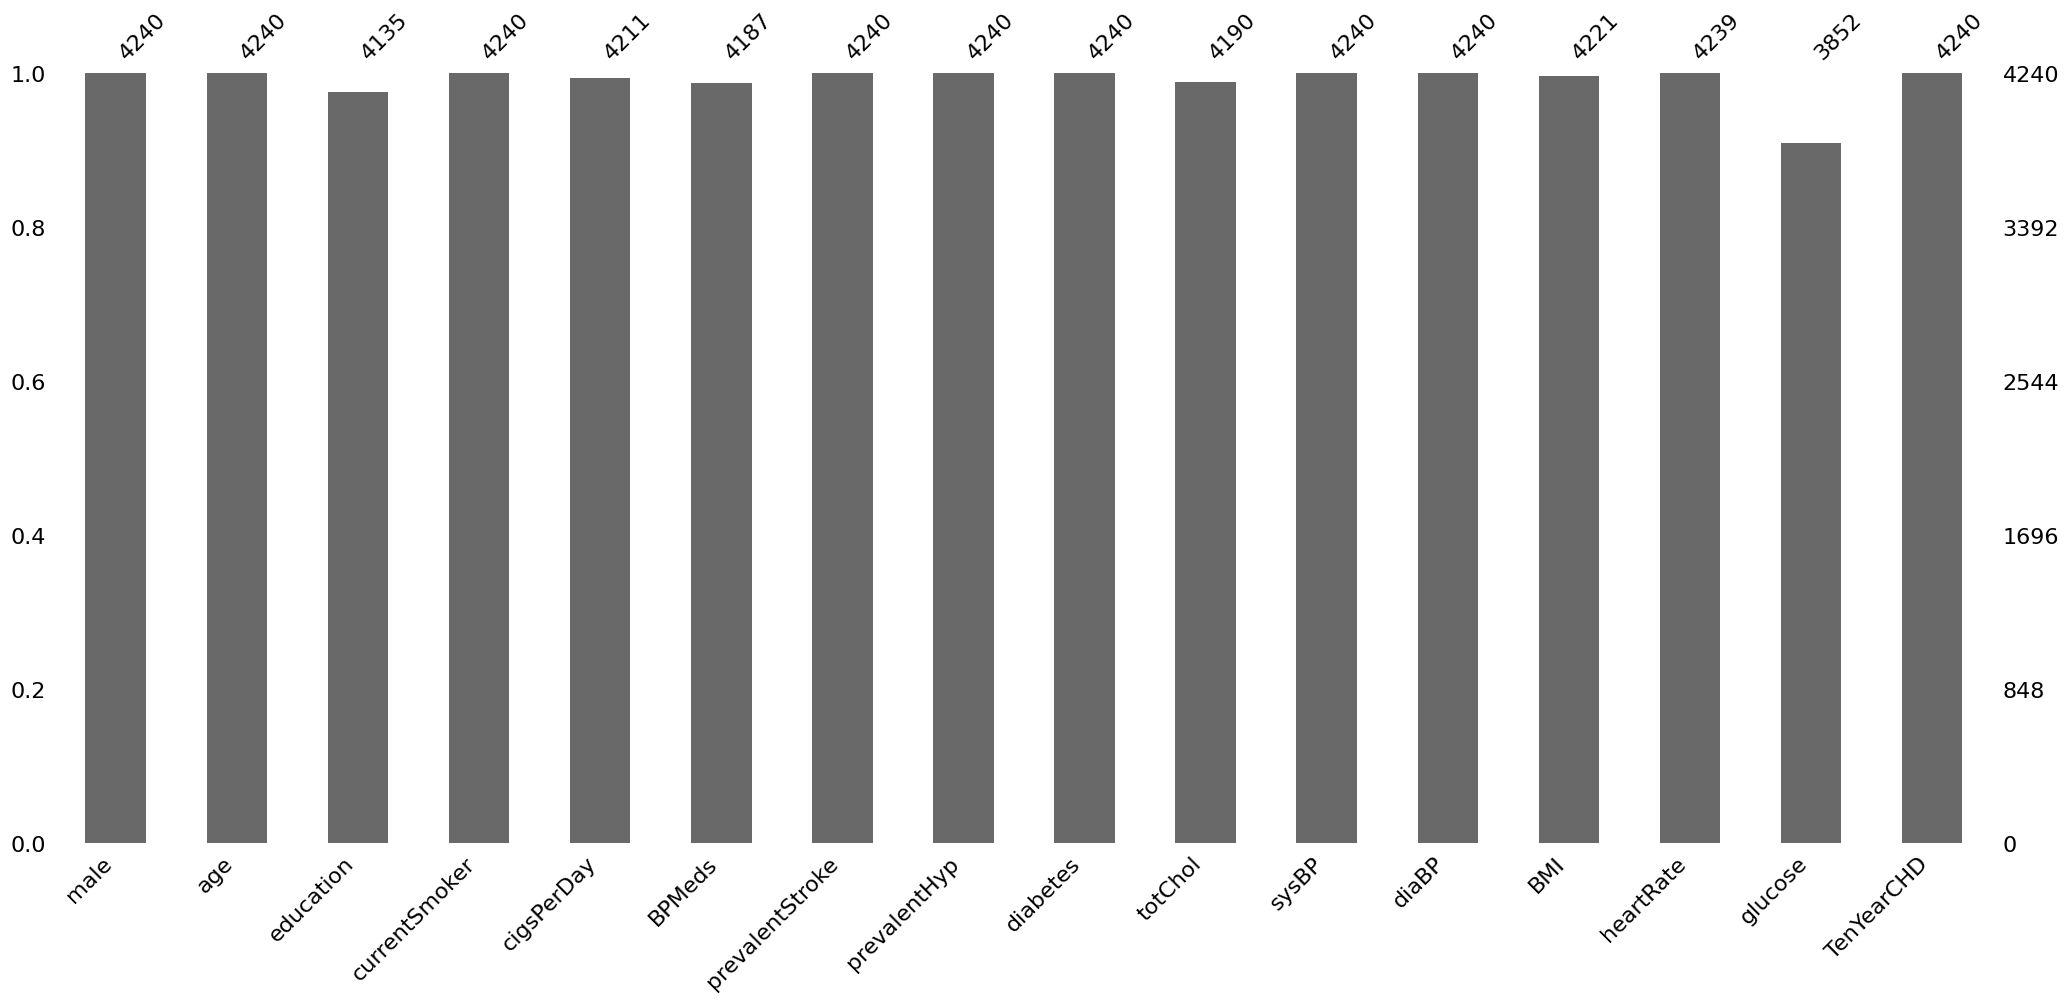

In [89]:
##Use missingno to graph missingness of columns
msno.bar(df_fhs)
plt.show()

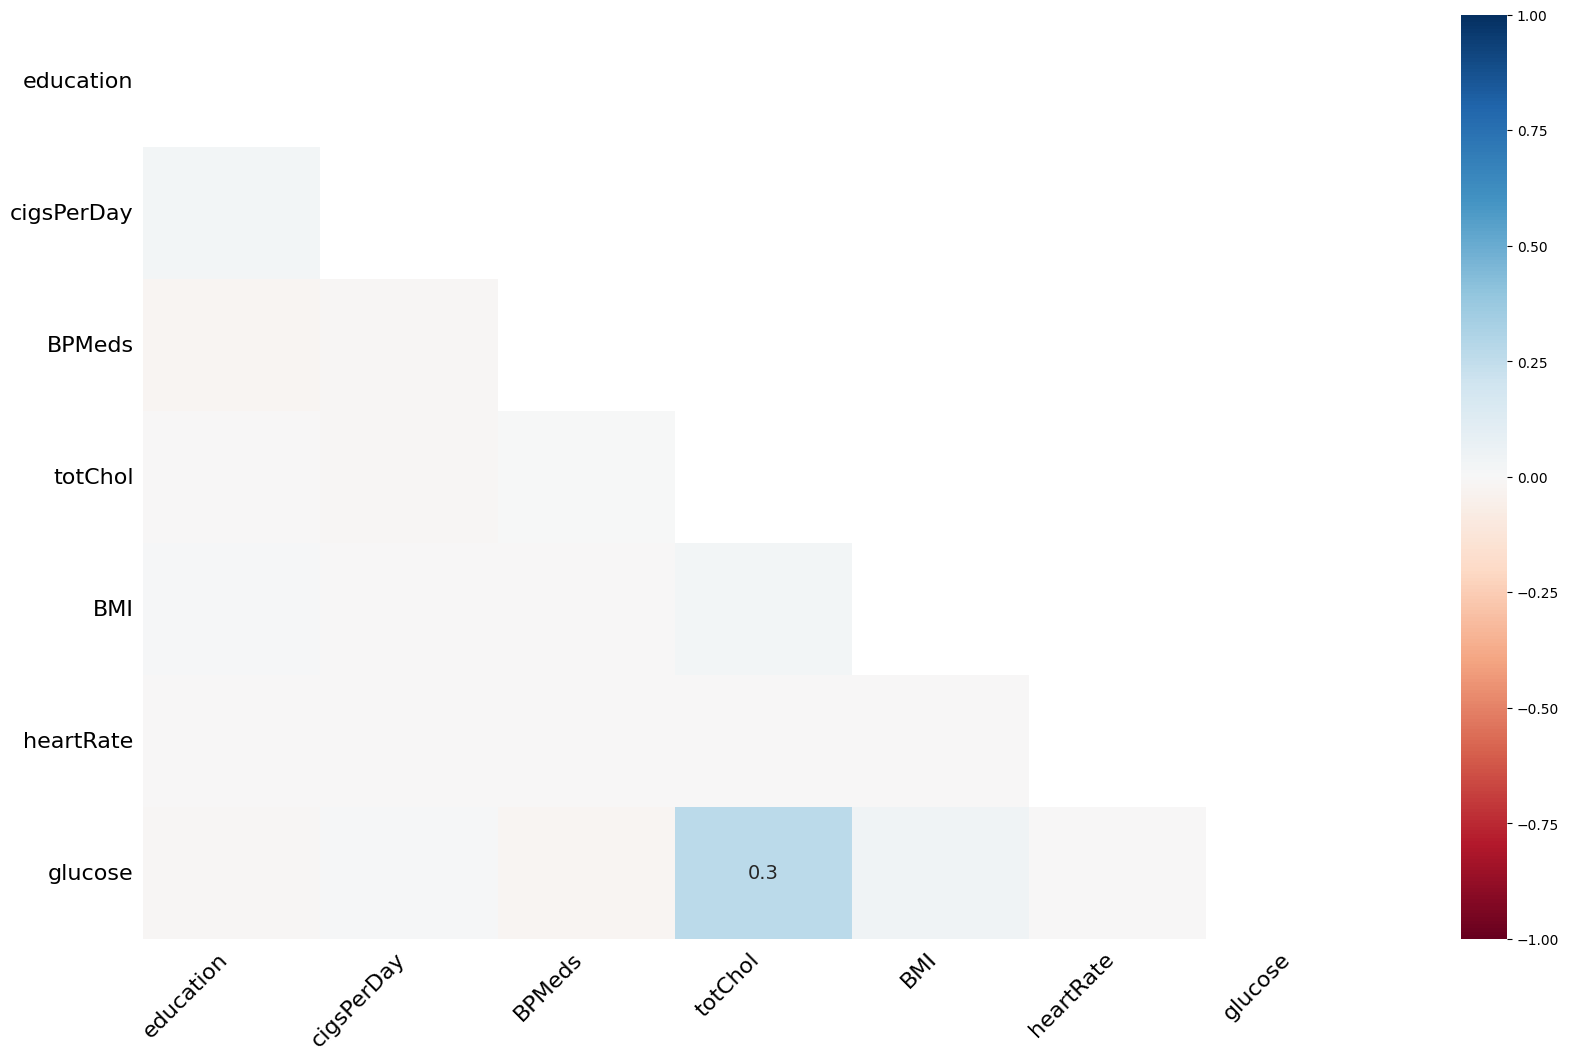

In [90]:
import missingno as msno
msno.heatmap(df_fhs) #relative heatmap of missingness
plt.show()

In [91]:
## Replace missing values with mean
df_fhs['education'] =df_fhs['education'].fillna(df_fhs['education'].mean())
df_fhs['glucose'] = df_fhs['glucose'].fillna(df_fhs['glucose'].mean())

In [92]:
(df_fhs.isnull().sum())*100/len(df_fhs)

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [93]:
df_fhs = df_fhs.dropna() #drop rows with >10% missingness

In [94]:
(df_fhs.isnull().sum())*100/len(df_fhs)

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
TenYearCHD        0.000
dtype: float64

In [95]:
## Check for duplicates
df_fhs.duplicated().sum()

0

TRANSFORM DATA

In [96]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4090 non-null   int64  
 1   age              4090 non-null   int64  
 2   education        4090 non-null   float64
 3   currentSmoker    4090 non-null   int64  
 4   cigsPerDay       4090 non-null   float64
 5   BPMeds           4090 non-null   float64
 6   prevalentStroke  4090 non-null   int64  
 7   prevalentHyp     4090 non-null   int64  
 8   diabetes         4090 non-null   int64  
 9   totChol          4090 non-null   float64
 10  sysBP            4090 non-null   float64
 11  diaBP            4090 non-null   float64
 12  BMI              4090 non-null   float64
 13  heartRate        4090 non-null   float64
 14  glucose          4090 non-null   float64
 15  TenYearCHD       4090 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 543.2 KB


In [97]:
df_fhs['diabetes'].unique()

array([0, 1])

In [98]:
df_fhs['diabetes'].value_counts(normalize=True)

0   0.975
1   0.025
Name: diabetes, dtype: float64

In [99]:
df_fhs['diabetes'] = df_fhs['diabetes'].replace([0,1],[1,2])

In [100]:
df_fhs['diabetes'].unique()

array([1, 2])

In [101]:
df_fhs['diabetes'].value_counts(normalize=True)

1   0.975
2   0.025
Name: diabetes, dtype: float64

In [102]:
pd.get_dummies(df_fhs['diabetes'])

,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4234,1,0
4236,1,0
4237,1,0
4238,1,0


In [103]:
#Data Exploration
df_fhs['TenYearCHD'].value_counts(normalize=True)

0   0.851
1   0.149
Name: TenYearCHD, dtype: float64

In [104]:
#bivariate distribution for smoking
df_fhs.groupby('currentSmoker').mean()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,0.338,51.300,1.964,0.000,0.037,0.008,0.356,1.032,238.771,135.023,84.147,26.479,75.156,83.048,0.141
1,0.535,47.627,2.001,18.350,0.021,0.003,0.261,1.018,234.464,129.319,81.589,25.089,76.544,80.680,0.159


In [105]:
df_fhs['smoker_cat'] = df_fhs['currentSmoker'].replace([0.0, 1.0],['nonsmoker', 'smoker'])

In [106]:
df_fhs.groupby('smoker_cat')['TenYearCHD'].mean()

smoker_cat
nonsmoker   0.141
smoker      0.159
Name: TenYearCHD, dtype: float64

In [107]:
#separating categorical variables
fhs_cat = df_fhs.select_dtypes(include=['category'])
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Empty DataFrame


In [108]:
#shows us variables that are categorical but might not be under the category type
df_fhs.nunique().sort_values()

male                  2
TenYearCHD            2
prevalentHyp          2
prevalentStroke       2
BPMeds                2
diabetes              2
currentSmoker         2
smoker_cat            2
education             5
cigsPerDay           33
age                  39
heartRate            73
glucose             142
diaBP               145
sysBP               232
totChol             245
BMI                1348
dtype: int64

In [109]:
col_int = df_fhs.nunique().reset_index()

In [110]:
#change to integers
col_int.columns=['features', 'categories']
col_int['categories'] = col_int['categories'].astype('int64')

In [111]:
col_int = col_int[col_int.categories<10]
col_int.features.values

array(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD', 'smoker_cat'],
      dtype=object)

In [112]:
fhs_cat_int = df_fhs[col_int.features.values]
fhs_cat_int

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,smoker_cat
0,1,4.000,0,0.000,0,0,1,0,nonsmoker
1,0,2.000,0,0.000,0,0,1,0,nonsmoker
2,1,1.000,1,0.000,0,0,1,0,smoker
3,0,3.000,1,0.000,0,1,1,1,smoker
4,0,3.000,1,0.000,0,0,1,0,smoker
...,...,...,...,...,...,...,...,...,...
4234,1,3.000,1,0.000,0,0,1,0,smoker
4236,0,1.000,1,0.000,0,0,1,0,smoker
4237,0,2.000,0,0.000,0,0,1,0,nonsmoker
4238,1,3.000,0,0.000,0,1,1,0,nonsmoker


In [113]:
#separating continuous variables
fhs_cont = df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   4090 non-null   float64
 1   cigsPerDay  4090 non-null   float64
 2   BPMeds      4090 non-null   float64
 3   totChol     4090 non-null   float64
 4   sysBP       4090 non-null   float64
 5   diaBP       4090 non-null   float64
 6   BMI         4090 non-null   float64
 7   heartRate   4090 non-null   float64
 8   glucose     4090 non-null   float64
dtypes: float64(9)
memory usage: 319.5 KB


In [114]:
df_fhs['TenYearCHD'].value_counts()

0    3479
1     611
Name: TenYearCHD, dtype: int64

<Axes: >

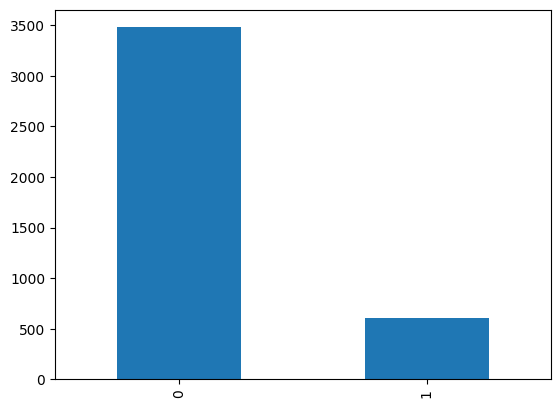

In [115]:
df_fhs['TenYearCHD'].value_counts().plot(kind='bar')

**Modeling**

Split into X and Y

In [116]:
fhs_cont = fhs_cont.drop(['education'], axis = 1)
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4090 non-null   float64
 1   BPMeds      4090 non-null   float64
 2   totChol     4090 non-null   float64
 3   sysBP       4090 non-null   float64
 4   diaBP       4090 non-null   float64
 5   BMI         4090 non-null   float64
 6   heartRate   4090 non-null   float64
 7   glucose     4090 non-null   float64
dtypes: float64(8)
memory usage: 287.6 KB


In [117]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4090 non-null   int64  
 1   age              4090 non-null   int64  
 2   education        4090 non-null   float64
 3   currentSmoker    4090 non-null   int64  
 4   cigsPerDay       4090 non-null   float64
 5   BPMeds           4090 non-null   float64
 6   prevalentStroke  4090 non-null   int64  
 7   prevalentHyp     4090 non-null   int64  
 8   diabetes         4090 non-null   int64  
 9   totChol          4090 non-null   float64
 10  sysBP            4090 non-null   float64
 11  diaBP            4090 non-null   float64
 12  BMI              4090 non-null   float64
 13  heartRate        4090 non-null   float64
 14  glucose          4090 non-null   float64
 15  TenYearCHD       4090 non-null   int64  
 16  smoker_cat       4090 non-null   object 
dtypes: float64(9),

In [118]:
# Separate the array into X and Y
x=fhs_cont
x.shape

(4090, 8)

In [119]:
#Create the response/outcome matrix
y = df_fhs['TenYearCHD']
y.shape

(4090,)

In [120]:
# Synthetic Minority Oversampling (SMOTE)
# Generate synthetic observations for the minority because our target category is so low(heart disease)

In [121]:
# load the smote algorithm
from imblearn.over_sampling import SMOTE

In [122]:
# create test and train and SMOTE the x matrices
# create an instance of the algorithm
#os = SMOTE(random_state=0)
#x_os,y_os = os.fit_resample(x,y)

In [123]:
# dimensions of the matrices
#x_os.shape, y_os.shape

In [124]:
# distribution of categories of target variable
#y_os.value_counts(normalize=True)

In [125]:
#create new database with data that has had SMOTE applied to it
#df_os = pd.DataFrame(x_os)
#df_os['TenYearCHD'] = y_os

In [178]:
statistics.mean(df_fhs['cigsPerDay'])

8.995354523227384

In [179]:
statistics.stdev(df_fhs['cigsPerDay'])

11.91338792576992

Split into train and test

In [126]:
#x_train, x_test, y_train, y_test = train_test_split(x_os,y_os, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
os = SMOTE(random_state=0)
#x_os,y_os = os.fit_resample(x_train,y_train)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)

In [127]:
# Scale the values (convert values to their z score)

In [128]:
#sc_train = StandardScaler().fit(x_train)
sc= StandardScaler()
#x_train_sc = sc_train.transform(x_train)
x_train_sc = sc.fit_transform(x_train_os)

In [129]:
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[ 2.626 -0.224  0.088  0.65  -0.206 -0.602 -0.056 -0.302]
 [-0.787 -0.224  0.133  0.397  0.282  0.338 -0.574 -0.712]
 [-0.787 -0.224 -1.509  1.24   0.363  1.444  0.635 -0.064]
 [ 0.919 -0.224  1.122 -1.289 -1.589 -0.571 -0.66  -0.063]
 [-0.787 -0.224 -1.711  1.24   1.34  -0.314 -0.919  0.21 ]]


**Training The Model**

In [130]:
# Create an instance of the Logistic Regression Model (our outcome is categorical, binary classification of yes or no (in this case heart disease or not))
model_lr = LogisticRegression(solver='liblinear')

In [131]:
# Use our trained data to train the model features
#model_lr.fit(x_train_sc, y_train)
model_lr.fit(x_train_sc, y_train_os)

LogisticRegression(solver='liblinear')

**Testing The Model**

In [132]:
# Scale test features (this is neccessary because we are using data that was scaled)
#sc_test = StandardScaler().fit(x_test)
#x_test_sc = sc_test.transform(x_test)
x_test_sc = sc.transform(x_test)
x_test_sc

array([[-0.787, -0.224,  1.774, ...,  3.263,  0.376,  0.517],
       [ 0.492, -0.224, -0.609, ...,  0.075,  1.671,  0.517],
       [-0.531, -0.224, -1.374, ..., -0.285, -0.487, -0.064],
       ...,
       [ 0.492, -0.224, -1.441, ..., -0.073, -0.919,  0.005],
       [-0.787, -0.224, -0.879, ..., -0.531, -1.005, -0.2  ],
       [ 0.492, -0.224, -1.891, ..., -0.24 , -0.056, -0.2  ]])

In [133]:
# Test our model using the test data
results = model_lr.score(x_test_sc, y_test)
results*100

66.42216788916056

In [134]:
results = model_lr.score(x_train_sc, y_train_os)
results*100

63.08545603944125

In [135]:
# Test our model using the test data
predicted_labels = model_lr.predict(x_test_sc)

# Evaluate additional metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 66.42%
Precision: 0.24
Recall: 0.56
F1 Score: 0.33
Confusion Matrix:
 [[713 332]
 [ 80 102]]


In [136]:
#List of features
features = list(fhs_cont.columns)
features

['cigsPerDay',
 'BPMeds',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [137]:
#Get coefficients
coefficients = model_lr.coef_
coefficients

array([[ 0.227, -0.01 ,  0.193,  0.682, -0.143,  0.044, -0.119,  0.184]])

In [138]:
coefficients = coefficients.ravel().tolist()
coefficients

[0.2267583713888901,
 -0.01048200232739793,
 0.19257330152258048,
 0.6818027918729496,
 -0.1434431014721934,
 0.04380262505819071,
 -0.11891976586955479,
 0.1843096170280897]

In [139]:
#table with features and their coefficients
data = {"Features": features,
        "Coefficients": coefficients}

coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='Coefficients')
coeff_table

,Features,Coefficients
4,diaBP,-0.143
6,heartRate,-0.119
1,BPMeds,-0.010
5,BMI,0.044
7,glucose,0.184
2,totChol,0.193
0,cigsPerDay,0.227
3,sysBP,0.682


<Axes: title={'center': 'Correlation with CHD'}>

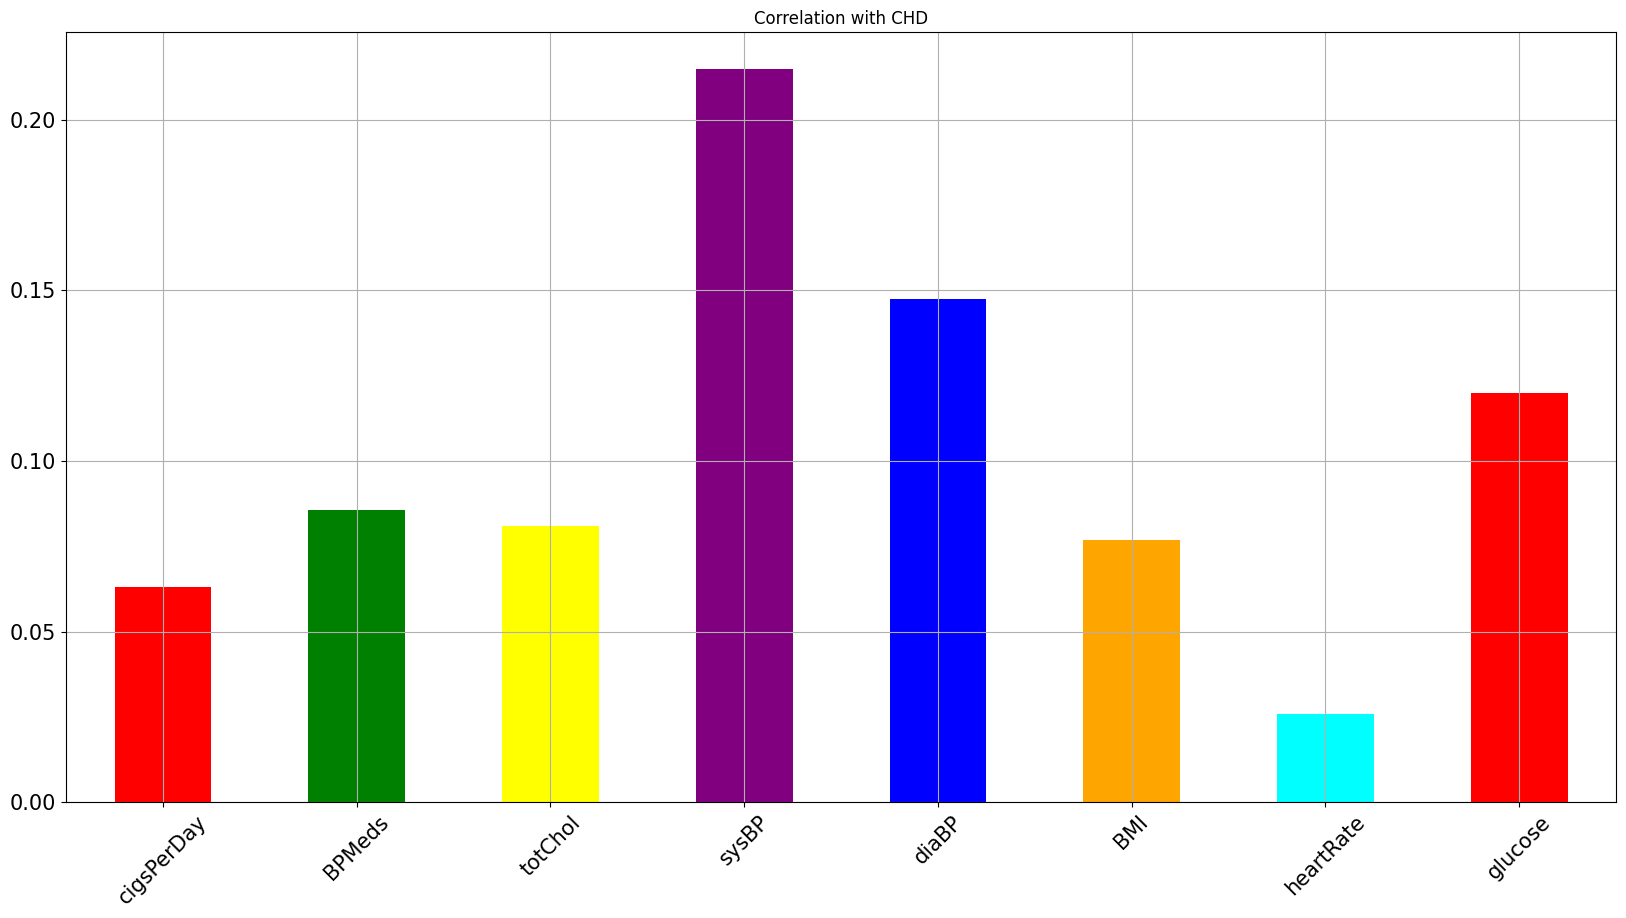

In [140]:
c = ['red','green','yellow','purple','blue','orange','cyan']
fhs_cont.corrwith(df_fhs['TenYearCHD']).plot.bar(figsize=(20,10), title = 'Correlation with CHD', fontsize = 15, rot = 45, grid=True, color =c )

In [141]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4090 non-null   int64  
 1   age              4090 non-null   int64  
 2   education        4090 non-null   float64
 3   currentSmoker    4090 non-null   int64  
 4   cigsPerDay       4090 non-null   float64
 5   BPMeds           4090 non-null   float64
 6   prevalentStroke  4090 non-null   int64  
 7   prevalentHyp     4090 non-null   int64  
 8   diabetes         4090 non-null   int64  
 9   totChol          4090 non-null   float64
 10  sysBP            4090 non-null   float64
 11  diaBP            4090 non-null   float64
 12  BMI              4090 non-null   float64
 13  heartRate        4090 non-null   float64
 14  glucose          4090 non-null   float64
 15  TenYearCHD       4090 non-null   int64  
 16  smoker_cat       4090 non-null   object 
dtypes: float64(9),

In [142]:
fhs_cont["hypertension"] = df_fhs["prevalentHyp"]
fhs_cont["currentSmoker"] = df_fhs["currentSmoker"]
fhs_cont["age"] = df_fhs["age"]
fhs_cont["diabetes"]= df_fhs["diabetes"]
fhs_cont["sex"] = df_fhs["male"]
fhs_cont.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cigsPerDay     4090 non-null   float64
 1   BPMeds         4090 non-null   float64
 2   totChol        4090 non-null   float64
 3   sysBP          4090 non-null   float64
 4   diaBP          4090 non-null   float64
 5   BMI            4090 non-null   float64
 6   heartRate      4090 non-null   float64
 7   glucose        4090 non-null   float64
 8   hypertension   4090 non-null   int64  
 9   currentSmoker  4090 non-null   int64  
 10  age            4090 non-null   int64  
 11  diabetes       4090 non-null   int64  
 12  sex            4090 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 447.3 KB


<Axes: title={'center': 'Correlation with CHD'}>

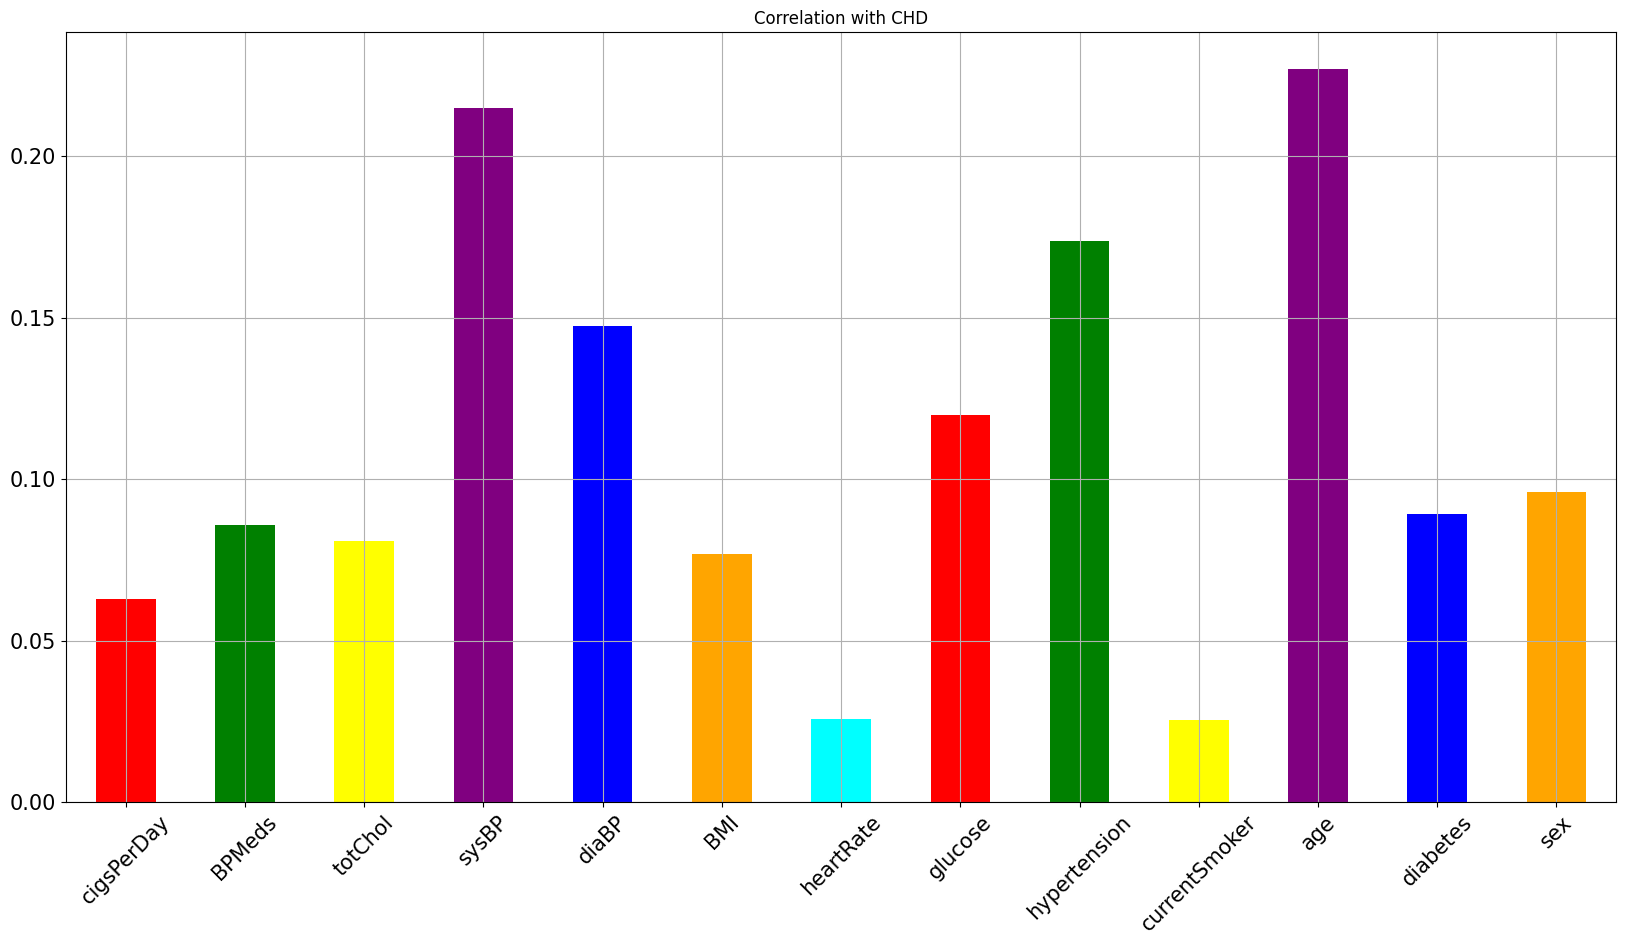

In [143]:
c = ['red','green','yellow','purple','blue','orange','cyan']
fhs_cont.corrwith(df_fhs['TenYearCHD']).plot.bar(figsize=(20,10), title = 'Correlation with CHD', fontsize = 15, rot = 45, grid=True, color =c )

In [144]:
#New model with categorical variables
X1 = fhs_cont
X1.shape

(4090, 13)

In [145]:
y1 = df_fhs['TenYearCHD']
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X1, y1)
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.3, random_state = 0)
model_lr_1 = LogisticRegression(solver= 'liblinear')
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)
model_lr_1.fit(X_train_sc, y_train)
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [146]:
results = model_lr_1.score(X_test_sc, y_test)
results*100


67.95977011494253

In [147]:
results = model_lr_1.score(X_train_sc, y_train)
results*100

68.2340862422998

In [148]:
features = list(fhs_cont.columns)
features

['cigsPerDay',
 'BPMeds',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'hypertension',
 'currentSmoker',
 'age',
 'diabetes',
 'sex']

In [149]:
coefficients = model_lr_1.coef_

In [150]:
coefficients = coefficients.ravel().tolist()
coefficients

[0.7455873333101569,
 0.0861868108110707,
 0.06910720923755166,
 0.42522523431435005,
 0.17992329854816416,
 0.013433789706768808,
 -0.08509238652155517,
 0.3406356436907546,
 -0.3570167146263853,
 -0.4293456996926091,
 0.5998681910902206,
 -0.1817103815176804,
 -0.16456672990530127]

In [151]:
data = {"Features": features,
        "Coefficients": coefficients}

coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='Coefficients')
coeff_table

,Features,Coefficients
9,currentSmoker,-0.429
8,hypertension,-0.357
11,diabetes,-0.182
12,sex,-0.165
6,heartRate,-0.085
5,BMI,0.013
2,totChol,0.069
1,BPMeds,0.086
4,diaBP,0.180
7,glucose,0.341


In [152]:
intercept = model_lr_1.intercept_[0]
print("Intercept (β0):", intercept)

Intercept (β0): 0.01566366549411203
